In [51]:
!pip install torchsummary

In [1]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module |
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
from torchsummary import summary              # for getting the summary of our model
from PIL import Image as im
import cv2
import re
#from torchsummary import summary 

In [2]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

In [3]:
#show_image(*train[19800])

In [4]:
df = pd.read_csv(r'/home/ahmed/CondaWorkSpace/Ahmeddataset/dataset_k/rektnet_label.csv')
df

,Unnamed: 0,Unnamed: 1,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R,\n
0,vid_37_frame_400_3.jpg,NaN,"[14, 1]","[7, 14]","[19, 15]","[5, 22]","[19, 23]","[2, 33]","[21, 35]",NaN
1,vid_37_frame_346_0.jpg,NaN,"[19, 4]","[12, 20]","[26, 20]","[10, 35]","[28, 35]","[7, 50]","[32, 50]",NaN
2,vid_37_frame_208_3.jpg,NaN,"[16, 1]","[9, 14]","[20, 13]","[8, 22]","[21, 22]","[4, 34]","[22, 35]",NaN
3,vid_36_frame_54_5.jpg,NaN,"[11, 0]","[7, 8]","[15, 8]","[6, 14]","[15, 14]","[4, 20]","[16, 21]",NaN
4,vid_37_frame_204_4.jpg,NaN,"[12, 0]","[6, 15]","[17, 15]","[4, 28]","[19, 28]","[2, 44]","[24, 43]",NaN
...,...,...,...,...,...,...,...,...,...,...
3192,vid_38_frame_575_6.jpg,NaN,"[13, 2]","[8, 11]","[16, 11]","[8, 18]","[18, 18]","[6, 27]","[19, 27]",NaN
3193,vid_42_frame_439_2.jpg,NaN,"[15, 2]","[9, 15]","[21, 15]","[8, 29]","[23, 28]","[6, 39]","[26, 39]",NaN
3194,vid_38_frame_937_1.jpg,NaN,"[20, 1]","[13, 18]","[27, 17]","[10, 33]","[30, 32]","[8, 50]","[35, 49]",NaN
3195,vid_62_frame_74_2.jpg,NaN,"[29, 5]","[20, 27]","[35, 28]","[17, 44]","[38, 46]","[12, 60]","[43, 61]",NaN


In [5]:
columns=['image_name', 'Unnamed: 1', 'top', 'mid_L_top'
         , 'mid_R_top','mid_L_bot', 'mid_R_bot', 'bot_L', 'bot_R', '\n']
df.columns=columns
df

,image_name,Unnamed: 1,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R,\n
0,vid_37_frame_400_3.jpg,NaN,"[14, 1]","[7, 14]","[19, 15]","[5, 22]","[19, 23]","[2, 33]","[21, 35]",NaN
1,vid_37_frame_346_0.jpg,NaN,"[19, 4]","[12, 20]","[26, 20]","[10, 35]","[28, 35]","[7, 50]","[32, 50]",NaN
2,vid_37_frame_208_3.jpg,NaN,"[16, 1]","[9, 14]","[20, 13]","[8, 22]","[21, 22]","[4, 34]","[22, 35]",NaN
3,vid_36_frame_54_5.jpg,NaN,"[11, 0]","[7, 8]","[15, 8]","[6, 14]","[15, 14]","[4, 20]","[16, 21]",NaN
4,vid_37_frame_204_4.jpg,NaN,"[12, 0]","[6, 15]","[17, 15]","[4, 28]","[19, 28]","[2, 44]","[24, 43]",NaN
...,...,...,...,...,...,...,...,...,...,...
3192,vid_38_frame_575_6.jpg,NaN,"[13, 2]","[8, 11]","[16, 11]","[8, 18]","[18, 18]","[6, 27]","[19, 27]",NaN
3193,vid_42_frame_439_2.jpg,NaN,"[15, 2]","[9, 15]","[21, 15]","[8, 29]","[23, 28]","[6, 39]","[26, 39]",NaN
3194,vid_38_frame_937_1.jpg,NaN,"[20, 1]","[13, 18]","[27, 17]","[10, 33]","[30, 32]","[8, 50]","[35, 49]",NaN
3195,vid_62_frame_74_2.jpg,NaN,"[29, 5]","[20, 27]","[35, 28]","[17, 44]","[38, 46]","[12, 60]","[43, 61]",NaN


In [6]:
df=df.drop(columns="Unnamed: 1")
df=df.drop(columns="\n")
df

,image_name,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R
0,vid_37_frame_400_3.jpg,"[14, 1]","[7, 14]","[19, 15]","[5, 22]","[19, 23]","[2, 33]","[21, 35]"
1,vid_37_frame_346_0.jpg,"[19, 4]","[12, 20]","[26, 20]","[10, 35]","[28, 35]","[7, 50]","[32, 50]"
2,vid_37_frame_208_3.jpg,"[16, 1]","[9, 14]","[20, 13]","[8, 22]","[21, 22]","[4, 34]","[22, 35]"
3,vid_36_frame_54_5.jpg,"[11, 0]","[7, 8]","[15, 8]","[6, 14]","[15, 14]","[4, 20]","[16, 21]"
4,vid_37_frame_204_4.jpg,"[12, 0]","[6, 15]","[17, 15]","[4, 28]","[19, 28]","[2, 44]","[24, 43]"
...,...,...,...,...,...,...,...,...
3192,vid_38_frame_575_6.jpg,"[13, 2]","[8, 11]","[16, 11]","[8, 18]","[18, 18]","[6, 27]","[19, 27]"
3193,vid_42_frame_439_2.jpg,"[15, 2]","[9, 15]","[21, 15]","[8, 29]","[23, 28]","[6, 39]","[26, 39]"
3194,vid_38_frame_937_1.jpg,"[20, 1]","[13, 18]","[27, 17]","[10, 33]","[30, 32]","[8, 50]","[35, 49]"
3195,vid_62_frame_74_2.jpg,"[29, 5]","[20, 27]","[35, 28]","[17, 44]","[38, 46]","[12, 60]","[43, 61]"


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
DATADIR = "/home/ahmed/CondaWorkSpace/Ahmeddataset/dataset_k/"

CATEGORIES = ["RektNet_Dataset"]
IMG_SIZE = 100
training_data = []
Labels = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                if(img in df["image_name"].values):
                    training_data.append(img_array)  # add this to our training_data
                    Labels.append(img)
                
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()
#
print(len(training_data))

100%|██████████| 23618/23618 [00:04<00:00, 4949.51it/s]

1088


In [8]:
training_dect = {Labels[i]: training_data[i] for i in range(len(Labels))}
training_dect

{'vid_18_frame_2250_2.jpg': array([[[ 94, 109, 112],
         [ 93, 108, 111],
         [ 92, 110, 111],
         ...,
         [ 93, 107, 113],
         [ 93, 107, 113],
         [ 96, 107, 111]],
 
        [[ 94, 109, 112],
         [ 96, 111, 114],
         [ 93, 111, 112],
         ...,
         [ 93, 107, 113],
         [ 93, 107, 113],
         [ 95, 107, 111]],
 
        [[ 91, 108, 111],
         [ 93, 110, 113],
         [ 93, 110, 113],
         ...,
         [ 93, 107, 113],
         [ 93, 107, 113],
         [ 95, 107, 111]],
 
        ...,
 
        [[ 91, 103, 107],
         [ 99, 111, 113],
         [ 90,  95,  96],
         ...,
         [120,  90,  71],
         [130, 104,  88],
         [131, 108,  93]],
 
        [[ 90, 102, 104],
         [ 82,  92,  92],
         [ 65,  70,  69],
         ...,
         [124, 104,  87],
         [120, 103,  90],
         [116, 102,  90]],
 
        [[ 88, 100, 102],
         [ 57,  67,  67],
         [ 49,  54,  53],
         ...,
 

In [9]:
df=df.set_index('image_name') 
df

,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R
image_name,,,,,,,
vid_37_frame_400_3.jpg,"[14, 1]","[7, 14]","[19, 15]","[5, 22]","[19, 23]","[2, 33]","[21, 35]"
vid_37_frame_346_0.jpg,"[19, 4]","[12, 20]","[26, 20]","[10, 35]","[28, 35]","[7, 50]","[32, 50]"
vid_37_frame_208_3.jpg,"[16, 1]","[9, 14]","[20, 13]","[8, 22]","[21, 22]","[4, 34]","[22, 35]"
vid_36_frame_54_5.jpg,"[11, 0]","[7, 8]","[15, 8]","[6, 14]","[15, 14]","[4, 20]","[16, 21]"
vid_37_frame_204_4.jpg,"[12, 0]","[6, 15]","[17, 15]","[4, 28]","[19, 28]","[2, 44]","[24, 43]"
...,...,...,...,...,...,...,...
vid_38_frame_575_6.jpg,"[13, 2]","[8, 11]","[16, 11]","[8, 18]","[18, 18]","[6, 27]","[19, 27]"
vid_42_frame_439_2.jpg,"[15, 2]","[9, 15]","[21, 15]","[8, 29]","[23, 28]","[6, 39]","[26, 39]"
vid_38_frame_937_1.jpg,"[20, 1]","[13, 18]","[27, 17]","[10, 33]","[30, 32]","[8, 50]","[35, 49]"


In [10]:
Series_images=pd.Series(training_dect)

In [11]:
Series_images.name="Image_array"
Series_images

vid_18_frame_2250_2.jpg    [[[94, 109, 112], [93, 108, 111], [92, 110, 11...
vid_31_frame_1918_7.jpg    [[[101, 103, 113], [100, 105, 114], [100, 105,...
vid_216_frame_205_0.jpg    [[[79, 106, 72], [78, 105, 71], [78, 105, 72],...
vid_125_frame_610_0.jpg    [[[74, 73, 63], [71, 73, 61], [70, 74, 62], [7...
vid_204_frame_185_1.jpg    [[[62, 85, 70], [62, 85, 70], [67, 86, 71], [6...
                                                 ...                        
vid_2_frame_26598_5.jpg    [[[84, 82, 88], [84, 82, 88], [85, 83, 89], [8...
vid_201_frame_9_0.jpg      [[[62, 84, 66], [62, 84, 66], [65, 84, 69], [6...
vid_18_frame_2181_0.jpg    [[[80, 78, 77], [80, 78, 77], [78, 79, 77], [7...
vid_2_frame_3910_1.jpg     [[[92, 95, 100], [91, 94, 99], [91, 94, 99], [...
vid_209_frame_167_0.jpg    [[[67, 71, 82], [65, 70, 79], [65, 67, 77], [6...
Name: Image_array, Length: 1088, dtype: object

In [14]:
df["Image_array"]=Series_images

In [15]:
df

,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R,Image_array
image_name,,,,,,,,
vid_37_frame_400_3.jpg,"[14, 1]","[7, 14]","[19, 15]","[5, 22]","[19, 23]","[2, 33]","[21, 35]",NaN
vid_37_frame_346_0.jpg,"[19, 4]","[12, 20]","[26, 20]","[10, 35]","[28, 35]","[7, 50]","[32, 50]",NaN
vid_37_frame_208_3.jpg,"[16, 1]","[9, 14]","[20, 13]","[8, 22]","[21, 22]","[4, 34]","[22, 35]",NaN
vid_36_frame_54_5.jpg,"[11, 0]","[7, 8]","[15, 8]","[6, 14]","[15, 14]","[4, 20]","[16, 21]",NaN
vid_37_frame_204_4.jpg,"[12, 0]","[6, 15]","[17, 15]","[4, 28]","[19, 28]","[2, 44]","[24, 43]",NaN
...,...,...,...,...,...,...,...,...
vid_38_frame_575_6.jpg,"[13, 2]","[8, 11]","[16, 11]","[8, 18]","[18, 18]","[6, 27]","[19, 27]",NaN
vid_42_frame_439_2.jpg,"[15, 2]","[9, 15]","[21, 15]","[8, 29]","[23, 28]","[6, 39]","[26, 39]",NaN
vid_38_frame_937_1.jpg,"[20, 1]","[13, 18]","[27, 17]","[10, 33]","[30, 32]","[8, 50]","[35, 49]",NaN


In [16]:
df=df.dropna(axis=0)
df

,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R,Image_array
image_name,,,,,,,,
vid_31_frame_2397_2.jpg,"[11, 0]","[6, 17]","[19, 16]","[6, 31]","[23, 28]","[5, 39]","[26, 36]","[[[74, 78, 73], [75, 78, 76], [73, 78, 77], [7..."
vid_31_frame_2390_5.jpg,"[14, 1]","[9, 17]","[24, 16]","[8, 33]","[28, 32]","[7, 42]","[31, 40]","[[[80, 79, 75], [80, 79, 75], [80, 79, 75], [7..."
vid_18_frame_2348_12.jpg,"[8, 2]","[5, 13]","[14, 12]","[5, 22]","[16, 20]","[6, 32]","[19, 29]","[[[113, 129, 136], [112, 128, 135], [107, 122,..."
vid_2_frame_22030_0.jpg,"[11, 4]","[9, 20]","[20, 18]","[10, 29]","[24, 28]","[10, 41]","[31, 38]","[[[95, 89, 94], [95, 89, 94], [93, 89, 94], [9..."
vid_18_frame_2111_1.jpg,"[14, 3]","[8, 23]","[23, 19]","[7, 39]","[28, 35]","[6, 57]","[33, 50]","[[[92, 100, 100], [92, 100, 100], [90, 96, 101..."
...,...,...,...,...,...,...,...,...
vid_207_frame_138_0.jpg,"[34, 3]","[24, 27]","[42, 27]","[20, 45]","[44, 46]","[13, 67]","[48, 69]","[[[64, 85, 70], [64, 85, 70], [61, 84, 69], [6..."
vid_204_frame_192_0.jpg,"[21, 2]","[14, 21]","[30, 22]","[12, 37]","[33, 36]","[9, 54]","[37, 53]","[[[51, 81, 70], [54, 82, 69], [60, 83, 69], [6..."
vid_230_frame_55_4.jpg,"[15, 1]","[10, 11]","[19, 11]","[9, 20]","[21, 20]","[6, 31]","[23, 32]","[[[81, 79, 91], [83, 82, 92], [89, 83, 94], [9..."


In [17]:
def string2list(ini_list):
    elements = re.findall(r'\d+', ini_list)
    res = [int(x) for x in elements]
    return res
string2list(df["top"].loc["vid_31_frame_2397_2.jpg"])

[11, 0]

In [18]:
#image=df["Image_array"].loc["vid_31_frame_2397_2.jpg"]
#image = cv2.circle(image, (6,31), radius=0, color=(0, 0, 255), thickness=-1)
#plt.imshow(image)
#plt.show()

In [19]:
df["top"]=df["top"].apply(string2list)

/tmp/ipykernel_3187/602308353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["top"]=df["top"].apply(string2list)


In [20]:
df["mid_L_top"]=df["mid_L_top"].apply(string2list)
df["mid_R_top"]=df["mid_R_top"].apply(string2list)
df["mid_L_bot"]=df["mid_L_bot"].apply(string2list)
df["mid_R_bot"]=df["mid_R_bot"].apply(string2list)
df["bot_L"]=df["bot_L"].apply(string2list)
df["bot_R"]=df["bot_R"].apply(string2list)

/tmp/ipykernel_3187/1578661151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mid_L_top"]=df["mid_L_top"].apply(string2list)
/tmp/ipykernel_3187/1578661151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mid_R_top"]=df["mid_R_top"].apply(string2list)
/tmp/ipykernel_3187/1578661151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [21]:
df

,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R,Image_array
image_name,,,,,,,,
vid_31_frame_2397_2.jpg,"[11, 0]","[6, 17]","[19, 16]","[6, 31]","[23, 28]","[5, 39]","[26, 36]","[[[74, 78, 73], [75, 78, 76], [73, 78, 77], [7..."
vid_31_frame_2390_5.jpg,"[14, 1]","[9, 17]","[24, 16]","[8, 33]","[28, 32]","[7, 42]","[31, 40]","[[[80, 79, 75], [80, 79, 75], [80, 79, 75], [7..."
vid_18_frame_2348_12.jpg,"[8, 2]","[5, 13]","[14, 12]","[5, 22]","[16, 20]","[6, 32]","[19, 29]","[[[113, 129, 136], [112, 128, 135], [107, 122,..."
vid_2_frame_22030_0.jpg,"[11, 4]","[9, 20]","[20, 18]","[10, 29]","[24, 28]","[10, 41]","[31, 38]","[[[95, 89, 94], [95, 89, 94], [93, 89, 94], [9..."
vid_18_frame_2111_1.jpg,"[14, 3]","[8, 23]","[23, 19]","[7, 39]","[28, 35]","[6, 57]","[33, 50]","[[[92, 100, 100], [92, 100, 100], [90, 96, 101..."
...,...,...,...,...,...,...,...,...
vid_207_frame_138_0.jpg,"[34, 3]","[24, 27]","[42, 27]","[20, 45]","[44, 46]","[13, 67]","[48, 69]","[[[64, 85, 70], [64, 85, 70], [61, 84, 69], [6..."
vid_204_frame_192_0.jpg,"[21, 2]","[14, 21]","[30, 22]","[12, 37]","[33, 36]","[9, 54]","[37, 53]","[[[51, 81, 70], [54, 82, 69], [60, 83, 69], [6..."
vid_230_frame_55_4.jpg,"[15, 1]","[10, 11]","[19, 11]","[9, 20]","[21, 20]","[6, 31]","[23, 32]","[[[81, 79, 91], [83, 82, 92], [89, 83, 94], [9..."


In [22]:
IMG_SIZE

100

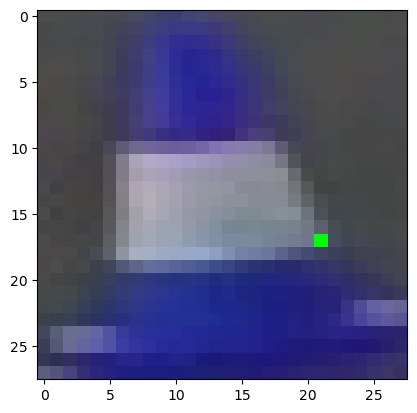

In [23]:
IMG_SIZE=28
image=df["Image_array"].loc["vid_31_frame_2397_2.jpg"]
image_r = cv2.resize(image, (IMG_SIZE, IMG_SIZE)) 

image = cv2.circle(image_r, (round((IMG_SIZE/image.shape[1])*23),round((IMG_SIZE/image.shape[0])*28)), radius=0, color=(0, 255, 0), thickness=-1)
plt.imshow(image)
plt.show()  

In [24]:
def Resize_image_move_Kpoints(row,New_IMG_SIZE):
    image=row["Image_array"]
    image_shape=image.shape
    image=cv2.resize(image, (New_IMG_SIZE, New_IMG_SIZE)) 
    row["Image_array"]=image
    row["top"]=[round(row["top"][0]*(New_IMG_SIZE/image_shape[1])),round(row["top"][1]*(New_IMG_SIZE/image_shape[0]))]
    row["mid_L_top"]=[round(row["mid_L_top"][0]*(New_IMG_SIZE/image_shape[1])),round(row["mid_L_top"][1]*(New_IMG_SIZE/image_shape[0]))]
    row["mid_R_top"]=[round(row["mid_R_top"][0]*(New_IMG_SIZE/image_shape[1])),round(row["mid_R_top"][1]*(New_IMG_SIZE/image_shape[0]))]
    row["mid_L_bot"]=[round(row["mid_L_bot"][0]*(New_IMG_SIZE/image_shape[1])),round(row["mid_L_bot"][1]*(New_IMG_SIZE/image_shape[0]))]
    row["mid_R_bot"]=[round(row["mid_R_bot"][0]*(New_IMG_SIZE/image_shape[1])),round(row["mid_R_bot"][1]*(New_IMG_SIZE/image_shape[0]))]
    row["bot_L"]=[round(row["bot_L"][0]*(New_IMG_SIZE/image_shape[1])),round(row["bot_L"][1]*(New_IMG_SIZE/image_shape[0]))]
    row["bot_R"]=[round(row["bot_R"][0]*(New_IMG_SIZE/image_shape[1])),round(row["bot_R"][1]*(New_IMG_SIZE/image_shape[0]))]     
    return row
def into_one_list(row):
    return row["top"]+row["mid_L_top"]+row["mid_R_top"]+row["mid_L_bot"]+row["mid_R_bot"]+row["bot_L"]+row["bot_R"]

# model with input size 80

In [34]:
df_resized_80=df.copy()
df_resized_80

,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R,Image_array
image_name,,,,,,,,
vid_31_frame_2397_2.jpg,"[11, 0]","[6, 17]","[19, 16]","[6, 31]","[23, 28]","[5, 39]","[26, 36]","[[[74, 78, 73], [75, 78, 76], [73, 78, 77], [7..."
vid_31_frame_2390_5.jpg,"[14, 1]","[9, 17]","[24, 16]","[8, 33]","[28, 32]","[7, 42]","[31, 40]","[[[80, 79, 75], [80, 79, 75], [80, 79, 75], [7..."
vid_18_frame_2348_12.jpg,"[8, 2]","[5, 13]","[14, 12]","[5, 22]","[16, 20]","[6, 32]","[19, 29]","[[[113, 129, 136], [112, 128, 135], [107, 122,..."
vid_2_frame_22030_0.jpg,"[11, 4]","[9, 20]","[20, 18]","[10, 29]","[24, 28]","[10, 41]","[31, 38]","[[[95, 89, 94], [95, 89, 94], [93, 89, 94], [9..."
vid_18_frame_2111_1.jpg,"[14, 3]","[8, 23]","[23, 19]","[7, 39]","[28, 35]","[6, 57]","[33, 50]","[[[92, 100, 100], [92, 100, 100], [90, 96, 101..."
...,...,...,...,...,...,...,...,...
vid_207_frame_138_0.jpg,"[34, 3]","[24, 27]","[42, 27]","[20, 45]","[44, 46]","[13, 67]","[48, 69]","[[[64, 85, 70], [64, 85, 70], [61, 84, 69], [6..."
vid_204_frame_192_0.jpg,"[21, 2]","[14, 21]","[30, 22]","[12, 37]","[33, 36]","[9, 54]","[37, 53]","[[[51, 81, 70], [54, 82, 69], [60, 83, 69], [6..."
vid_230_frame_55_4.jpg,"[15, 1]","[10, 11]","[19, 11]","[9, 20]","[21, 20]","[6, 31]","[23, 32]","[[[81, 79, 91], [83, 82, 92], [89, 83, 94], [9..."


In [35]:
df_resized_80 = df_resized_80.apply(lambda x: Resize_image_move_Kpoints(x, 80), axis=1)
df_resized_80

,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R,Image_array
image_name,,,,,,,,
vid_31_frame_2397_2.jpg,"[29, 0]","[16, 30]","[51, 28]","[16, 54]","[61, 49]","[13, 68]","[69, 63]","[[[74, 78, 73], [74, 78, 73], [74, 78, 74], [7..."
vid_31_frame_2390_5.jpg,"[27, 1]","[17, 25]","[46, 23]","[15, 48]","[53, 47]","[13, 61]","[59, 58]","[[[80, 79, 75], [80, 79, 75], [80, 79, 75], [8..."
vid_18_frame_2348_12.jpg,"[26, 4]","[16, 26]","[45, 24]","[16, 44]","[51, 40]","[19, 64]","[61, 58]","[[[113, 129, 136], [113, 129, 136], [113, 129,..."
vid_2_frame_22030_0.jpg,"[21, 7]","[17, 33]","[38, 30]","[19, 48]","[46, 47]","[19, 68]","[59, 63]","[[[95, 89, 94], [95, 89, 94], [95, 89, 94], [9..."
vid_18_frame_2111_1.jpg,"[29, 4]","[16, 28]","[47, 23]","[14, 47]","[57, 42]","[12, 69]","[68, 61]","[[[92, 100, 100], [92, 100, 100], [92, 100, 10..."
...,...,...,...,...,...,...,...,...
vid_207_frame_138_0.jpg,"[46, 3]","[33, 27]","[57, 27]","[27, 44]","[60, 45]","[18, 66]","[65, 68]","[[[64, 85, 70], [64, 85, 70], [63, 85, 69], [6..."
vid_204_frame_192_0.jpg,"[37, 2]","[24, 26]","[52, 28]","[21, 46]","[57, 45]","[16, 68]","[64, 66]","[[[51, 81, 70], [52, 81, 69], [54, 82, 69], [5..."
vid_230_frame_55_4.jpg,"[44, 2]","[30, 24]","[56, 24]","[27, 43]","[62, 43]","[18, 67]","[68, 69]","[[[81, 79, 91], [81, 79, 91], [81, 80, 91], [8..."


In [36]:
df_resized_80["Train_y"] = df_resized_80.apply(lambda x: into_one_list(x), axis=1)
df_resized_80

,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R,Image_array,Train_y
image_name,,,,,,,,,
vid_31_frame_2397_2.jpg,"[29, 0]","[16, 30]","[51, 28]","[16, 54]","[61, 49]","[13, 68]","[69, 63]","[[[74, 78, 73], [74, 78, 73], [74, 78, 74], [7...","[29, 0, 16, 30, 51, 28, 16, 54, 61, 49, 13, 68..."
vid_31_frame_2390_5.jpg,"[27, 1]","[17, 25]","[46, 23]","[15, 48]","[53, 47]","[13, 61]","[59, 58]","[[[80, 79, 75], [80, 79, 75], [80, 79, 75], [8...","[27, 1, 17, 25, 46, 23, 15, 48, 53, 47, 13, 61..."
vid_18_frame_2348_12.jpg,"[26, 4]","[16, 26]","[45, 24]","[16, 44]","[51, 40]","[19, 64]","[61, 58]","[[[113, 129, 136], [113, 129, 136], [113, 129,...","[26, 4, 16, 26, 45, 24, 16, 44, 51, 40, 19, 64..."
vid_2_frame_22030_0.jpg,"[21, 7]","[17, 33]","[38, 30]","[19, 48]","[46, 47]","[19, 68]","[59, 63]","[[[95, 89, 94], [95, 89, 94], [95, 89, 94], [9...","[21, 7, 17, 33, 38, 30, 19, 48, 46, 47, 19, 68..."
vid_18_frame_2111_1.jpg,"[29, 4]","[16, 28]","[47, 23]","[14, 47]","[57, 42]","[12, 69]","[68, 61]","[[[92, 100, 100], [92, 100, 100], [92, 100, 10...","[29, 4, 16, 28, 47, 23, 14, 47, 57, 42, 12, 69..."
...,...,...,...,...,...,...,...,...,...
vid_207_frame_138_0.jpg,"[46, 3]","[33, 27]","[57, 27]","[27, 44]","[60, 45]","[18, 66]","[65, 68]","[[[64, 85, 70], [64, 85, 70], [63, 85, 69], [6...","[46, 3, 33, 27, 57, 27, 27, 44, 60, 45, 18, 66..."
vid_204_frame_192_0.jpg,"[37, 2]","[24, 26]","[52, 28]","[21, 46]","[57, 45]","[16, 68]","[64, 66]","[[[51, 81, 70], [52, 81, 69], [54, 82, 69], [5...","[37, 2, 24, 26, 52, 28, 21, 46, 57, 45, 16, 68..."
vid_230_frame_55_4.jpg,"[44, 2]","[30, 24]","[56, 24]","[27, 43]","[62, 43]","[18, 67]","[68, 69]","[[[81, 79, 91], [81, 79, 91], [81, 80, 91], [8...","[44, 2, 30, 24, 56, 24, 27, 43, 62, 43, 18, 67..."


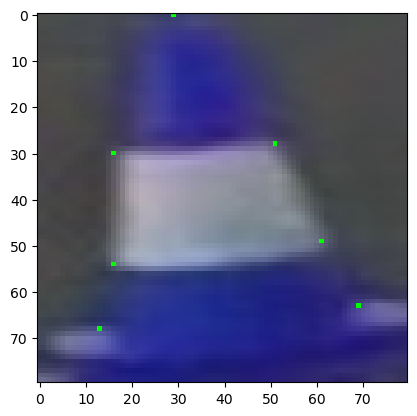

In [37]:
IMG_SIZE=28
row=df_resized_80.loc["vid_31_frame_2397_2.jpg"]
image=row["Image_array"]
image = cv2.circle(image, (row["top"][0],row["top"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["mid_L_top"][0],row["mid_L_top"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["mid_R_top"][0],row["mid_R_top"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["mid_L_bot"][0],row["mid_L_bot"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["mid_R_bot"][0],row["mid_R_bot"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["bot_L"][0],row["bot_L"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["bot_R"][0],row["bot_R"][1]), radius=0, color=(0, 255, 0), thickness=-1)
plt.imshow(image)
plt.show()  

In [38]:
Train_x=df_resized_80['Image_array'].values.tolist()
Train_x= [item for item in Train_x]
def HWC2CHW(img):
    data = im.fromarray(img)
    to_tensor = transforms.ToTensor()
    tensor = to_tensor(data)
    return tensor.numpy()



In [39]:
counter=0
for img in Train_x:
    Train_x[counter]=HWC2CHW(img)
    counter=counter+1

In [40]:
Train_x[0].shape

(3, 80, 80)

In [41]:
Train_y=df_resized_80["Train_y"].tolist()
Train_y=np.array(Train_y)
Train_y = torch.from_numpy(Train_y)
Train_y.shape

torch.Size([1088, 14])

In [42]:
train_data = []
for i in range(len(Train_x)):
    train_data.append([Train_x[i], Train_y[i]])


len(train_data)


1088

In [43]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size, pin_memory=True)
i1, l1 = next(iter(trainloader))
print(i1.shape)

torch.Size([4, 3, 80, 80])


In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device: ',device)

device:  cuda


In [47]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)
             #MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
             ]
    return nn.Sequential(*layers)
class ResNet_insize80(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.res1 = nn.Sequential(ConvBlock(64, 64), ConvBlock(64, 64))
        self.res2 = nn.Sequential(ConvBlock(64, 128), ConvBlock(128, 128))
        self.res3 = nn.Sequential(ConvBlock(128, 256), ConvBlock(256, 256))
        self.res4 = nn.Sequential(ConvBlock(256, 512), ConvBlock(512, 512))
        self.conv2=ConvBlock(64, 128)
        self.conv3=ConvBlock(128, 256)
        self.conv4=ConvBlock(256, 512)
        self.classifier = nn.Sequential(
                                       nn.Flatten(),
                                       nn.Linear(512*80*80, num_classes))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.res1(out) + out
        out = self.res2(out) + self.conv2(out)       
        out = self.res3(out) + self.conv3(out)  
        out = self.res4(out) + self.conv4(out)  
        out = self.classifier(out)
        return out 
model = ResNet_insize80(3, 14).to(device=device)
model

ResNet_insize80(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (res2): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(1

In [48]:
# getting summary of the model
INPUT_SHAPE = (3, 80, 80)
print(summary(model.cuda(), (INPUT_SHAPE)))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 80, 80]           1,792
       BatchNorm2d-2           [-1, 64, 80, 80]             128
              ReLU-3           [-1, 64, 80, 80]               0
            Conv2d-4           [-1, 64, 80, 80]          36,928
       BatchNorm2d-5           [-1, 64, 80, 80]             128
              ReLU-6           [-1, 64, 80, 80]               0
            Conv2d-7           [-1, 64, 80, 80]          36,928
       BatchNorm2d-8           [-1, 64, 80, 80]             128
              ReLU-9           [-1, 64, 80, 80]               0
           Conv2d-10          [-1, 128, 80, 80]          73,856
      BatchNorm2d-11          [-1, 128, 80, 80]             256
             ReLU-12          [-1, 128, 80, 80]               0
           Conv2d-13          [-1, 128, 80, 80]         147,584
      BatchNorm2d-14          [-1, 128,

In [49]:
# setting the batch size

learning_rate=0.001
num_epochs=70

In [50]:
#Loss and Optimizer
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)

In [54]:
# Train Network
num_epochs=30
for epoch in range(num_epochs):
    print(f'epoch: {epoch+1}/{num_epochs} ')
    for batch_idx, (data,targets) in enumerate(tqdm(trainloader)):

        #getting the data
        data=data.to(device=device)
        targets=targets.to(device=device)
        # data is the batch of data, targets is the target label of each sample in the batch
        

        #forward
        scores=model(data)
        loss=criterion(scores,targets.float())
        
        torch.set_grad_enabled(True)  # Context-manager 

        #backward
        optimizer.zero_grad()
        loss.backward()

        #gradient descent -- Adam
        optimizer.step()
    #print('validation accuracy=',check_accuracy(loader=valid_dl,model=model))

epoch: 1/30 


100%|██████████| 272/272 [00:45<00:00,  5.96it/s]


epoch: 2/30 


100%|██████████| 272/272 [00:46<00:00,  5.91it/s]


epoch: 3/30 


100%|██████████| 272/272 [00:46<00:00,  5.90it/s]


epoch: 4/30 


100%|██████████| 272/272 [00:46<00:00,  5.90it/s]


epoch: 5/30 


100%|██████████| 272/272 [00:46<00:00,  5.89it/s]


epoch: 6/30 


100%|██████████| 272/272 [00:46<00:00,  5.89it/s]


epoch: 7/30 


100%|██████████| 272/272 [00:46<00:00,  5.89it/s]


epoch: 8/30 


100%|██████████| 272/272 [00:46<00:00,  5.89it/s]


epoch: 9/30 


100%|██████████| 272/272 [00:46<00:00,  5.89it/s]


epoch: 10/30 


100%|██████████| 272/272 [00:46<00:00,  5.89it/s]


epoch: 11/30 


100%|██████████| 272/272 [00:46<00:00,  5.89it/s]


epoch: 12/30 


100%|██████████| 272/272 [00:46<00:00,  5.89it/s]


epoch: 13/30 


100%|██████████| 272/272 [00:46<00:00,  5.90it/s]


epoch: 14/30 


100%|██████████| 272/272 [00:46<00:00,  5.89it/s]


epoch: 15/30 


100%|██████████| 272/272 [00:46<00:00,  5.90it/s]


epoch: 16/30 


100%|██████████| 272/272 [00:46<00:00,  5.90it/s]


epoch: 17/30 


100%|██████████| 272/272 [00:46<00:00,  5.90it/s]


epoch: 18/30 


100%|██████████| 272/272 [00:46<00:00,  5.91it/s]


epoch: 19/30 


100%|██████████| 272/272 [00:46<00:00,  5.91it/s]


epoch: 20/30 


100%|██████████| 272/272 [00:46<00:00,  5.91it/s]


epoch: 21/30 


100%|██████████| 272/272 [00:46<00:00,  5.91it/s]


epoch: 22/30 


100%|██████████| 272/272 [00:46<00:00,  5.91it/s]


epoch: 23/30 


100%|██████████| 272/272 [00:45<00:00,  5.92it/s]


epoch: 24/30 


100%|██████████| 272/272 [00:45<00:00,  5.92it/s]


epoch: 25/30 


100%|██████████| 272/272 [00:46<00:00,  5.88it/s]


epoch: 26/30 


100%|██████████| 272/272 [00:45<00:00,  5.92it/s]


epoch: 27/30 


100%|██████████| 272/272 [00:45<00:00,  5.92it/s]


epoch: 28/30 


100%|██████████| 272/272 [00:45<00:00,  5.92it/s]


epoch: 29/30 


100%|██████████| 272/272 [00:45<00:00,  5.92it/s]


epoch: 30/30 


100%|██████████| 272/272 [00:46<00:00,  5.91it/s]


In [70]:
PATH_save="/home/ahmed/CondaWorkSpace/Ahmeddataset/dataset_k/models/RESNE_input80.2.pt"
#torch.save(model.state_dict(), PATH_save)

In [54]:
# Load
PATH_load="/home/ahmed/CondaWorkSpace/Ahmeddataset/dataset_k/models/RESNE_input80.1.pt"

model = ResNet_insize80(3, 14).to(device=device)
model.load_state_dict(torch.load(PATH_load))
model.eval()

ResNet_insize80(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (res2): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(1

In [263]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    # _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return yb

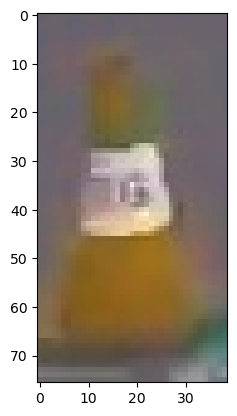

In [297]:
img = cv2.imread("/home/ahmed/CondaWorkSpace/Ahmeddataset/dataset_k/RektNet_Dataset/vid_2_frame_4303_3.jpg")
plt.imshow(img)
plt.show()
img_shape=img.shape

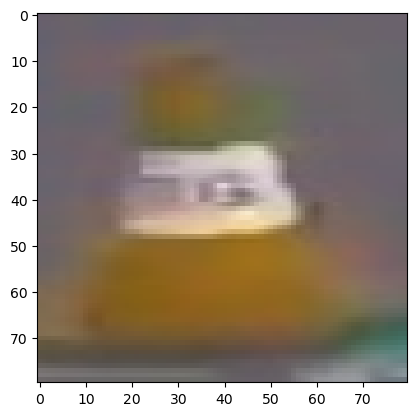

(80, 80, 3)


In [298]:
img=cv2.resize(img, (80, 80)) 
plt.imshow(img)
plt.show()
print(img.shape)

In [299]:
#img=df_resized_80['Image_array']["vid_2_frame_4303_3.jpg"]
data = im.fromarray(img)
to_tensor = transforms.ToTensor()
tensor = to_tensor(data)
p=predict_image(tensor, model).round()#.tolist();
p

tensor([[36.,  8., 22., 30., 48., 28., 20., 44., 55., 43., 12., 61., 63., 62.]],
       device='cuda:0', grad_fn=<RoundBackward0>)

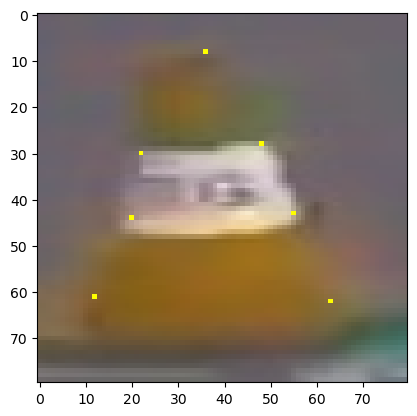

In [300]:

image=img
image = cv2.circle(image, (int(p[0][0]),int(p[0][1])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][2]),int(p[0][3])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][4]),int(p[0][5])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][6]),int(p[0][7])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][8]),int(p[0][9])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][10]),int(p[0][11])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][12]),int(p[0][13])), radius=0, color=(255, 255, 0), thickness=-1)
plt.imshow(image)
plt.show()  

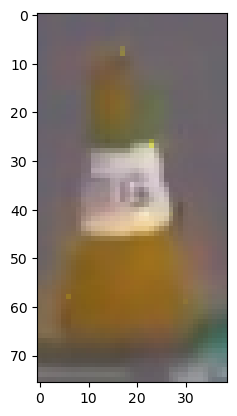

(76, 39, 3)


In [301]:
img=cv2.resize(img, (img_shape[1], img_shape[0])) 
plt.imshow(img)
plt.show()
print(img.shape)

In [304]:
def key_point_size_transform(p,image_out_input_X,image_out_input_Y,image_size_out_X, image_size_out_Y):
    counter=0
    image_out_input_X=80
    image_out_input_Y=80
    image_size_out_X=img_shape[1]
    image_size_out_Y=img_shape[0]
    for p_elemrnt in p:
        print(counter)
        if(counter%2):
            p[counter]=round(p_elemrnt*(image_size_out_Y/image_out_input_Y))
        else:
            p[counter]=round(p_elemrnt*(image_size_out_X/image_out_input_X))
        counter=counter+1
    return p
p1=key_point_size_transform(p[0].tolist(), 80 ,80 ,img_shape[1],img_shape[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [310]:
p=p1

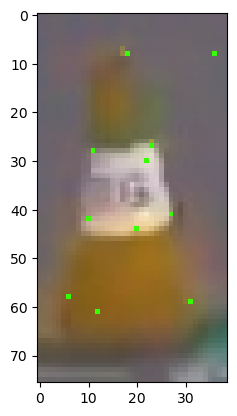

In [311]:

image=img
image = cv2.circle(image, (int(p[0]),int(p[1])), radius=0, color=(55, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[2]),int(p[3])), radius=0, color=(55, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[4]),int(p[5])), radius=0, color=(55, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[6]),int(p[7])), radius=0, color=(55, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[8]),int(p[9])), radius=0, color=(55, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[10]),int(p[11])), radius=0, color=(55, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[12]),int(p[13])), radius=0, color=(55, 255, 0), thickness=-1)
plt.imshow(image)
plt.show()  

In [307]:
img_shape

(76, 39, 3)

In [287]:
image_size_out_X

39

In [186]:
image_size_out_Y

76

In [205]:
*(image_size_out_X/image_out_input_X)

0.4875

In [223]:
for p_elemrnt in p[0]:
    print("p: ",p_elemrnt)

p:  36.0
p:  8.0
p:  22.0
p:  30.0
p:  48.0
p:  28.0
p:  20.0
p:  44.0
p:  55.0
p:  43.0
p:  12.0
p:  61.0
p:  63.0
p:  62.0


# model with input size 30

In [66]:
df_resized_30=df.copy()
df_resized_30

,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R,Image_array
image_name,,,,,,,,
vid_31_frame_2397_2.jpg,"[11, 0]","[6, 17]","[19, 16]","[6, 31]","[23, 28]","[5, 39]","[26, 36]","[[[74, 78, 73], [75, 78, 76], [73, 78, 77], [7..."
vid_31_frame_2390_5.jpg,"[14, 1]","[9, 17]","[24, 16]","[8, 33]","[28, 32]","[7, 42]","[31, 40]","[[[80, 79, 75], [80, 79, 75], [80, 79, 75], [7..."
vid_18_frame_2348_12.jpg,"[8, 2]","[5, 13]","[14, 12]","[5, 22]","[16, 20]","[6, 32]","[19, 29]","[[[113, 129, 136], [112, 128, 135], [107, 122,..."
vid_2_frame_22030_0.jpg,"[11, 4]","[9, 20]","[20, 18]","[10, 29]","[24, 28]","[10, 41]","[31, 38]","[[[95, 89, 94], [95, 89, 94], [93, 89, 94], [9..."
vid_18_frame_2111_1.jpg,"[14, 3]","[8, 23]","[23, 19]","[7, 39]","[28, 35]","[6, 57]","[33, 50]","[[[92, 100, 100], [92, 100, 100], [90, 96, 101..."
...,...,...,...,...,...,...,...,...
vid_207_frame_138_0.jpg,"[34, 3]","[24, 27]","[42, 27]","[20, 45]","[44, 46]","[13, 67]","[48, 69]","[[[64, 85, 70], [64, 85, 70], [61, 84, 69], [6..."
vid_204_frame_192_0.jpg,"[21, 2]","[14, 21]","[30, 22]","[12, 37]","[33, 36]","[9, 54]","[37, 53]","[[[51, 81, 70], [54, 82, 69], [60, 83, 69], [6..."
vid_230_frame_55_4.jpg,"[15, 1]","[10, 11]","[19, 11]","[9, 20]","[21, 20]","[6, 31]","[23, 32]","[[[81, 79, 91], [83, 82, 92], [89, 83, 94], [9..."


In [67]:
df_resized_30 = df_resized_30.apply(lambda x: Resize_image_move_Kpoints(x, 30), axis=1)
df_resized_30

,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R,Image_array
image_name,,,,,,,,
vid_31_frame_2397_2.jpg,"[11, 0]","[6, 11]","[19, 10]","[6, 20]","[23, 18]","[5, 25]","[26, 23]","[[[74, 78, 73], [75, 78, 75], [72, 77, 77], [7..."
vid_31_frame_2390_5.jpg,"[10, 1]","[6, 9]","[17, 9]","[6, 18]","[20, 17]","[5, 23]","[22, 22]","[[[79, 78, 75], [79, 78, 75], [79, 78, 75], [7..."
vid_18_frame_2348_12.jpg,"[10, 2]","[6, 10]","[17, 9]","[6, 16]","[19, 15]","[7, 24]","[23, 22]","[[[113, 129, 136], [112, 128, 135], [109, 124,..."
vid_2_frame_22030_0.jpg,"[8, 2]","[6, 12]","[14, 11]","[7, 18]","[17, 18]","[7, 26]","[22, 24]","[[[95, 89, 94], [94, 89, 94], [94, 90, 95], [9..."
vid_18_frame_2111_1.jpg,"[11, 1]","[6, 10]","[18, 9]","[5, 18]","[22, 16]","[5, 26]","[25, 23]","[[[91, 99, 99], [90, 97, 100], [89, 95, 100], ..."
...,...,...,...,...,...,...,...,...
vid_207_frame_138_0.jpg,"[17, 1]","[12, 10]","[21, 10]","[10, 17]","[22, 17]","[7, 25]","[24, 26]","[[[63, 84, 69], [57, 80, 65], [62, 85, 70], [6..."
vid_204_frame_192_0.jpg,"[14, 1]","[9, 10]","[20, 10]","[8, 17]","[22, 17]","[6, 25]","[24, 25]","[[[54, 82, 71], [59, 83, 70], [64, 83, 68], [6..."
vid_230_frame_55_4.jpg,"[17, 1]","[11, 9]","[21, 9]","[10, 16]","[23, 16]","[7, 25]","[26, 26]","[[[82, 80, 92], [83, 82, 92], [88, 83, 94], [9..."


In [68]:
df_resized_30["Train_y"] = df_resized_30.apply(lambda x: into_one_list(x), axis=1)
df_resized_30

,top,mid_L_top,mid_R_top,mid_L_bot,mid_R_bot,bot_L,bot_R,Image_array,Train_y
image_name,,,,,,,,,
vid_31_frame_2397_2.jpg,"[11, 0]","[6, 11]","[19, 10]","[6, 20]","[23, 18]","[5, 25]","[26, 23]","[[[74, 78, 73], [75, 78, 75], [72, 77, 77], [7...","[11, 0, 6, 11, 19, 10, 6, 20, 23, 18, 5, 25, 2..."
vid_31_frame_2390_5.jpg,"[10, 1]","[6, 9]","[17, 9]","[6, 18]","[20, 17]","[5, 23]","[22, 22]","[[[79, 78, 75], [79, 78, 75], [79, 78, 75], [7...","[10, 1, 6, 9, 17, 9, 6, 18, 20, 17, 5, 23, 22,..."
vid_18_frame_2348_12.jpg,"[10, 2]","[6, 10]","[17, 9]","[6, 16]","[19, 15]","[7, 24]","[23, 22]","[[[113, 129, 136], [112, 128, 135], [109, 124,...","[10, 2, 6, 10, 17, 9, 6, 16, 19, 15, 7, 24, 23..."
vid_2_frame_22030_0.jpg,"[8, 2]","[6, 12]","[14, 11]","[7, 18]","[17, 18]","[7, 26]","[22, 24]","[[[95, 89, 94], [94, 89, 94], [94, 90, 95], [9...","[8, 2, 6, 12, 14, 11, 7, 18, 17, 18, 7, 26, 22..."
vid_18_frame_2111_1.jpg,"[11, 1]","[6, 10]","[18, 9]","[5, 18]","[22, 16]","[5, 26]","[25, 23]","[[[91, 99, 99], [90, 97, 100], [89, 95, 100], ...","[11, 1, 6, 10, 18, 9, 5, 18, 22, 16, 5, 26, 25..."
...,...,...,...,...,...,...,...,...,...
vid_207_frame_138_0.jpg,"[17, 1]","[12, 10]","[21, 10]","[10, 17]","[22, 17]","[7, 25]","[24, 26]","[[[63, 84, 69], [57, 80, 65], [62, 85, 70], [6...","[17, 1, 12, 10, 21, 10, 10, 17, 22, 17, 7, 25,..."
vid_204_frame_192_0.jpg,"[14, 1]","[9, 10]","[20, 10]","[8, 17]","[22, 17]","[6, 25]","[24, 25]","[[[54, 82, 71], [59, 83, 70], [64, 83, 68], [6...","[14, 1, 9, 10, 20, 10, 8, 17, 22, 17, 6, 25, 2..."
vid_230_frame_55_4.jpg,"[17, 1]","[11, 9]","[21, 9]","[10, 16]","[23, 16]","[7, 25]","[26, 26]","[[[82, 80, 92], [83, 82, 92], [88, 83, 94], [9...","[17, 1, 11, 9, 21, 9, 10, 16, 23, 16, 7, 25, 2..."


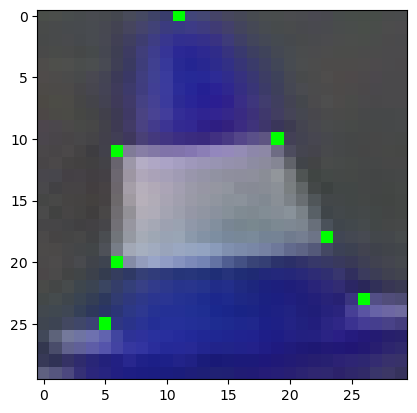

In [69]:
IMG_SIZE=28
row=df_resized_30.loc["vid_31_frame_2397_2.jpg"]
image=row["Image_array"]
image = cv2.circle(image, (row["top"][0],row["top"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["mid_L_top"][0],row["mid_L_top"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["mid_R_top"][0],row["mid_R_top"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["mid_L_bot"][0],row["mid_L_bot"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["mid_R_bot"][0],row["mid_R_bot"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["bot_L"][0],row["bot_L"][1]), radius=0, color=(0, 255, 0), thickness=-1)
image = cv2.circle(image, (row["bot_R"][0],row["bot_R"][1]), radius=0, color=(0, 255, 0), thickness=-1)
plt.imshow(image)
plt.show()  

In [70]:
Train_x=df_resized_30['Image_array'].values.tolist()
Train_x= [item for item in Train_x]
def HWC2CHW(img):
    data = im.fromarray(img)
    to_tensor = transforms.ToTensor()
    tensor = to_tensor(data)
    return tensor.numpy()



In [71]:
counter=0
for img in Train_x:
    Train_x[counter]=HWC2CHW(img)
    counter=counter+1

In [72]:
Train_x[0].shape

(3, 30, 30)

In [73]:
Train_y=df_resized_30["Train_y"].tolist()
Train_y=np.array(Train_y)
Train_y = torch.from_numpy(Train_y)
Train_y.shape

torch.Size([1088, 14])

In [74]:
train_data = []
for i in range(len(Train_x)):
    train_data.append([Train_x[i], Train_y[i]])


len(train_data)


1088

In [75]:
batch_size = 16
trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size, pin_memory=True)
i1, l1 = next(iter(trainloader))
print(i1.shape)

torch.Size([16, 3, 30, 30])


In [76]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device: ',device)

device:  cuda


In [77]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)
             #MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
             ]
    return nn.Sequential(*layers)
class ResNet_insize30(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.res1 = nn.Sequential(ConvBlock(64, 64), ConvBlock(64, 64))
        self.res2 = nn.Sequential(ConvBlock(64, 128), ConvBlock(128, 128))
        self.res3 = nn.Sequential(ConvBlock(128, 256), ConvBlock(256, 256))
        self.res4 = nn.Sequential(ConvBlock(256, 512), ConvBlock(512, 512))
        self.conv2=ConvBlock(64, 128)
        self.conv3=ConvBlock(128, 256)
        self.conv4=ConvBlock(256, 512)
        self.classifier = nn.Sequential(
                                       nn.Flatten(),
                                       nn.Linear(512*30*30, num_classes))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.res1(out) + out
        out = self.res2(out) + self.conv2(out)       
        out = self.res3(out) + self.conv3(out)  
        out = self.res4(out) + self.conv4(out)  
        out = self.classifier(out)
        return out 
model = ResNet_insize30(3, 14).to(device=device)
model

ResNet_insize30(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (res2): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(1

In [78]:
# getting summary of the model
INPUT_SHAPE = (3, 30, 30)
print(summary(model.cuda(), (INPUT_SHAPE)))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 30, 30]           1,792
       BatchNorm2d-2           [-1, 64, 30, 30]             128
              ReLU-3           [-1, 64, 30, 30]               0
            Conv2d-4           [-1, 64, 30, 30]          36,928
       BatchNorm2d-5           [-1, 64, 30, 30]             128
              ReLU-6           [-1, 64, 30, 30]               0
            Conv2d-7           [-1, 64, 30, 30]          36,928
       BatchNorm2d-8           [-1, 64, 30, 30]             128
              ReLU-9           [-1, 64, 30, 30]               0
           Conv2d-10          [-1, 128, 30, 30]          73,856
      BatchNorm2d-11          [-1, 128, 30, 30]             256
             ReLU-12          [-1, 128, 30, 30]               0
           Conv2d-13          [-1, 128, 30, 30]         147,584
      BatchNorm2d-14          [-1, 128,

In [79]:
# setting the batch size

learning_rate=0.0001
num_epochs=250

In [80]:
#Loss and Optimizer
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)

In [81]:
# Train Network
for epoch in range(num_epochs):
    print(f'epoch: {epoch+1}/{num_epochs} ')
    for batch_idx, (data,targets) in enumerate(tqdm(trainloader)):

        #getting the data
        data=data.to(device=device)
        targets=targets.to(device=device)
        # data is the batch of data, targets is the target label of each sample in the batch
        

        #forward
        scores=model(data)
        loss=criterion(scores,targets.float())
        
        torch.set_grad_enabled(True)  # Context-manager 

        #backward
        optimizer.zero_grad()
        loss.backward()

        #gradient descent -- Adam
        optimizer.step()
    #print('validation accuracy=',check_accuracy(loader=valid_dl,model=model))

epoch: 1/250 


100%|██████████| 68/68 [00:04<00:00, 14.40it/s]


epoch: 2/250 


100%|██████████| 68/68 [00:04<00:00, 14.28it/s]


epoch: 3/250 


100%|██████████| 68/68 [00:04<00:00, 14.61it/s]


epoch: 4/250 


100%|██████████| 68/68 [00:04<00:00, 14.61it/s]


epoch: 5/250 


100%|██████████| 68/68 [00:04<00:00, 14.53it/s]


epoch: 6/250 


100%|██████████| 68/68 [00:04<00:00, 14.58it/s]


epoch: 7/250 


100%|██████████| 68/68 [00:04<00:00, 14.55it/s]


epoch: 8/250 


100%|██████████| 68/68 [00:04<00:00, 14.55it/s]


epoch: 9/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 10/250 


100%|██████████| 68/68 [00:04<00:00, 14.53it/s]


epoch: 11/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 12/250 


100%|██████████| 68/68 [00:04<00:00, 14.54it/s]


epoch: 13/250 


100%|██████████| 68/68 [00:04<00:00, 14.51it/s]


epoch: 14/250 


100%|██████████| 68/68 [00:04<00:00, 14.52it/s]


epoch: 15/250 


100%|██████████| 68/68 [00:04<00:00, 14.52it/s]


epoch: 16/250 


100%|██████████| 68/68 [00:04<00:00, 14.52it/s]


epoch: 17/250 


100%|██████████| 68/68 [00:04<00:00, 14.52it/s]


epoch: 18/250 


100%|██████████| 68/68 [00:04<00:00, 14.53it/s]


epoch: 19/250 


100%|██████████| 68/68 [00:04<00:00, 14.51it/s]


epoch: 20/250 


100%|██████████| 68/68 [00:04<00:00, 14.53it/s]


epoch: 21/250 


100%|██████████| 68/68 [00:04<00:00, 14.51it/s]


epoch: 22/250 


100%|██████████| 68/68 [00:04<00:00, 14.52it/s]


epoch: 23/250 


100%|██████████| 68/68 [00:04<00:00, 14.52it/s]


epoch: 24/250 


100%|██████████| 68/68 [00:04<00:00, 14.54it/s]


epoch: 25/250 


100%|██████████| 68/68 [00:04<00:00, 14.51it/s]


epoch: 26/250 


100%|██████████| 68/68 [00:04<00:00, 14.52it/s]


epoch: 27/250 


100%|██████████| 68/68 [00:04<00:00, 14.52it/s]


epoch: 28/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 29/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 30/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 31/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 32/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 33/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 34/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 35/250 


100%|██████████| 68/68 [00:04<00:00, 14.33it/s]


epoch: 36/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 37/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 38/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 39/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 40/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 41/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 42/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 43/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 44/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 45/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 46/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 47/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 48/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 49/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 50/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 51/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 52/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 53/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 54/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 55/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 56/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 57/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 58/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 59/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 60/250 


100%|██████████| 68/68 [00:04<00:00, 14.42it/s]


epoch: 61/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 62/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 63/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 64/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 65/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 66/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 67/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 68/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 69/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 70/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 71/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 72/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 73/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 74/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 75/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 76/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 77/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 78/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 79/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 80/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 81/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 82/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 83/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 84/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 85/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 86/250 


100%|██████████| 68/68 [00:04<00:00, 14.30it/s]


epoch: 87/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 88/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 89/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 90/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 91/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 92/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 93/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 94/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 95/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 96/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 97/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 98/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 99/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 100/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 101/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 102/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 103/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 104/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 105/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 106/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 107/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 108/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 109/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 110/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 111/250 


100%|██████████| 68/68 [00:04<00:00, 14.39it/s]


epoch: 112/250 


100%|██████████| 68/68 [00:04<00:00, 14.42it/s]


epoch: 113/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 114/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 115/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 116/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 117/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 118/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 119/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 120/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 121/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 122/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 123/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 124/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 125/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 126/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 127/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 128/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 129/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 130/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 131/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 132/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 133/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 134/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 135/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 136/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 137/250 


100%|██████████| 68/68 [00:04<00:00, 14.30it/s]


epoch: 138/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 139/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 140/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 141/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 142/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 143/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 144/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 145/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 146/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 147/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 148/250 


100%|██████████| 68/68 [00:04<00:00, 14.43it/s]


epoch: 149/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 150/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 151/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 152/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 153/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 154/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 155/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 156/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 157/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 158/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 159/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 160/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 161/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 162/250 


100%|██████████| 68/68 [00:04<00:00, 14.40it/s]


epoch: 163/250 


100%|██████████| 68/68 [00:04<00:00, 14.40it/s]


epoch: 164/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 165/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 166/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 167/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 168/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 169/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 170/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 171/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 172/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 173/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 174/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 175/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 176/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 177/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 178/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 179/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 180/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 181/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 182/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 183/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 184/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 185/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 186/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 187/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 188/250 


100%|██████████| 68/68 [00:04<00:00, 14.31it/s]


epoch: 189/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 190/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 191/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 192/250 


100%|██████████| 68/68 [00:04<00:00, 14.44it/s]


epoch: 193/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 194/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 195/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 196/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 197/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 198/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 199/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 200/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 201/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 202/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 203/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 204/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 205/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 206/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 207/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 208/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 209/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 210/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 211/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 212/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 213/250 


100%|██████████| 68/68 [00:04<00:00, 14.42it/s]


epoch: 214/250 


100%|██████████| 68/68 [00:04<00:00, 14.43it/s]


epoch: 215/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 216/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 217/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 218/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 219/250 


100%|██████████| 68/68 [00:04<00:00, 14.45it/s]


epoch: 220/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 221/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 222/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 223/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 224/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 225/250 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 226/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 227/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 228/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 229/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 230/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 231/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 232/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 233/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 234/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 235/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 236/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 237/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 238/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 239/250 


100%|██████████| 68/68 [00:04<00:00, 14.36it/s]


epoch: 240/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 241/250 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 242/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 243/250 


100%|██████████| 68/68 [00:04<00:00, 14.46it/s]


epoch: 244/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 245/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 246/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 247/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 248/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 249/250 


100%|██████████| 68/68 [00:04<00:00, 14.47it/s]


epoch: 250/250 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


In [87]:
# Train Network
# setting the batch size

learning_rate=0.00001
num_epochs=50
#Loss and Optimizer
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)

for epoch in range(num_epochs):
    print(f'epoch: {epoch+1}/{num_epochs} ')
    for batch_idx, (data,targets) in enumerate(tqdm(trainloader)):

        #getting the data
        data=data.to(device=device)
        targets=targets.to(device=device)
        # data is the batch of data, targets is the target label of each sample in the batch
        

        #forward
        scores=model(data)
        loss=criterion(scores,targets.float())
        
        torch.set_grad_enabled(True)  # Context-manager 

        #backward
        optimizer.zero_grad()
        loss.backward()

        #gradient descent -- Adam
        optimizer.step()
    #print('validation accuracy=',check_accuracy(loader=valid_dl,model=model))

epoch: 1/50 


100%|██████████| 68/68 [00:04<00:00, 14.83it/s]


epoch: 2/50 


100%|██████████| 68/68 [00:04<00:00, 14.69it/s]


epoch: 3/50 


100%|██████████| 68/68 [00:04<00:00, 14.64it/s]


epoch: 4/50 


100%|██████████| 68/68 [00:04<00:00, 14.62it/s]


epoch: 5/50 


100%|██████████| 68/68 [00:04<00:00, 14.57it/s]


epoch: 6/50 


100%|██████████| 68/68 [00:04<00:00, 13.97it/s]


epoch: 7/50 


100%|██████████| 68/68 [00:04<00:00, 14.55it/s]


epoch: 8/50 


100%|██████████| 68/68 [00:04<00:00, 14.54it/s]


epoch: 9/50 


100%|██████████| 68/68 [00:04<00:00, 14.55it/s]


epoch: 10/50 


100%|██████████| 68/68 [00:04<00:00, 14.55it/s]


epoch: 11/50 


100%|██████████| 68/68 [00:04<00:00, 14.56it/s]


epoch: 12/50 


100%|██████████| 68/68 [00:04<00:00, 14.56it/s]


epoch: 13/50 


100%|██████████| 68/68 [00:04<00:00, 14.57it/s]


epoch: 14/50 


100%|██████████| 68/68 [00:04<00:00, 14.57it/s]


epoch: 15/50 


100%|██████████| 68/68 [00:04<00:00, 14.57it/s]


epoch: 16/50 


100%|██████████| 68/68 [00:04<00:00, 14.57it/s]


epoch: 17/50 


100%|██████████| 68/68 [00:04<00:00, 14.57it/s]


epoch: 18/50 


100%|██████████| 68/68 [00:04<00:00, 14.56it/s]


epoch: 19/50 


100%|██████████| 68/68 [00:04<00:00, 14.55it/s]


epoch: 20/50 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 21/50 


100%|██████████| 68/68 [00:04<00:00, 14.54it/s]


epoch: 22/50 


100%|██████████| 68/68 [00:04<00:00, 14.54it/s]


epoch: 23/50 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 24/50 


100%|██████████| 68/68 [00:04<00:00, 14.48it/s]


epoch: 25/50 


100%|██████████| 68/68 [00:04<00:00, 14.52it/s]


epoch: 26/50 


100%|██████████| 68/68 [00:04<00:00, 14.55it/s]


epoch: 27/50 


100%|██████████| 68/68 [00:04<00:00, 14.53it/s]


epoch: 28/50 


100%|██████████| 68/68 [00:04<00:00, 14.53it/s]


epoch: 29/50 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 30/50 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 31/50 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 32/50 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 33/50 


100%|██████████| 68/68 [00:04<00:00, 14.52it/s]


epoch: 34/50 


100%|██████████| 68/68 [00:04<00:00, 14.51it/s]


epoch: 35/50 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 36/50 


100%|██████████| 68/68 [00:04<00:00, 14.51it/s]


epoch: 37/50 


100%|██████████| 68/68 [00:04<00:00, 14.52it/s]


epoch: 38/50 


100%|██████████| 68/68 [00:04<00:00, 14.51it/s]


epoch: 39/50 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 40/50 


100%|██████████| 68/68 [00:04<00:00, 14.53it/s]


epoch: 41/50 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 42/50 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 43/50 


100%|██████████| 68/68 [00:04<00:00, 14.49it/s]


epoch: 44/50 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 45/50 


100%|██████████| 68/68 [00:04<00:00, 14.51it/s]


epoch: 46/50 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


epoch: 47/50 


100%|██████████| 68/68 [00:04<00:00, 14.51it/s]


epoch: 48/50 


100%|██████████| 68/68 [00:04<00:00, 14.51it/s]


epoch: 49/50 


100%|██████████| 68/68 [00:04<00:00, 14.36it/s]


epoch: 50/50 


100%|██████████| 68/68 [00:04<00:00, 14.50it/s]


In [82]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    # _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return yb

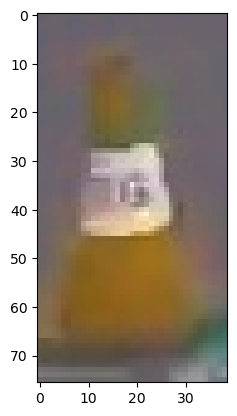

In [88]:
img = cv2.imread("/home/ahmed/CondaWorkSpace/Ahmeddataset/dataset_k/RektNet_Dataset/vid_2_frame_4303_3.jpg")
plt.imshow(img)
plt.show()
img_shape=img.shape

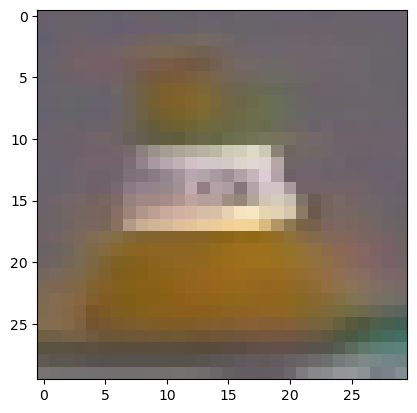

(30, 30, 3)


In [89]:
img=cv2.resize(img, (30, 30)) 
plt.imshow(img)
plt.show()
print(img.shape)

In [90]:
#img=df_resized_30['Image_array']["vid_2_frame_4303_3.jpg"]
data = im.fromarray(img)
to_tensor = transforms.ToTensor()
tensor = to_tensor(data)
p=predict_image(tensor, model).round()#.tolist();
p

tensor([[13.,  3.,  8., 11., 18., 10.,  6., 17., 20., 16.,  4., 23., 23., 22.]],
       device='cuda:0', grad_fn=<RoundBackward0>)

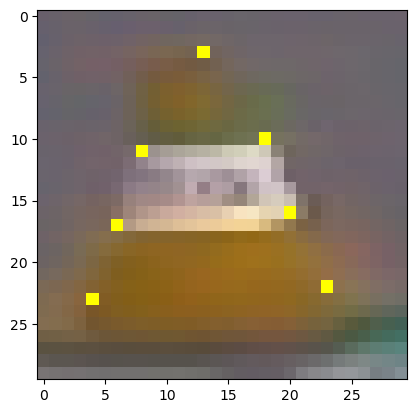

In [91]:

image=img
image = cv2.circle(image, (int(p[0][0]),int(p[0][1])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][2]),int(p[0][3])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][4]),int(p[0][5])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][6]),int(p[0][7])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][8]),int(p[0][9])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][10]),int(p[0][11])), radius=0, color=(255, 255, 0), thickness=-1)
image = cv2.circle(image, (int(p[0][12]),int(p[0][13])), radius=0, color=(255, 255, 0), thickness=-1)
plt.imshow(image)
plt.show()  

In [92]:
PATH_save="/home/ahmed/CondaWorkSpace/Ahmeddataset/dataset_k/models/RESNE_input30x30.1.pt"
#torch.save(model.state_dict(), PATH_save)